In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re, json
from collections import defaultdict

## Carga de datos

### Twitter

In [2]:
twitter_path = 'Data/Twitter/Twitter_Data.csv'
twitter_data = pd.read_csv(twitter_path)
twitter_data

/var/folders/2h/91q4sd4x3t13f8n_dy5nkj_00000gn/T/ipykernel_1424/2898866676.py:2: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_data = pd.read_csv(twitter_path)


,n_replies,text,text_clean,text_lemma,Topic_label,id,body_words,all_body_words,Distinctly.Emotoinal,Distinctly.Moral,...,party,ACount_unq,MCount_unq,shared,posCount_unq,shared_pos,negCount_unq,shared_neg,channel,day
0,1388,"Over 1,100,000 people killed by guns in the US...",people killed guns usa since @johnlennon shot ...,people kill gun usa since @johnlennon shoot ki...,Gun Control,1.0,11,20,0,0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,Twitter,2015-12-01
1,762,"Over 1,100,000 people killed by guns in the US...",people killed guns usa since @johnlennon shot ...,people kill gun usa since @johnlennon shoot ki...,Gun Control,2.0,11,20,0,0,...,NaN,0.0,0.0,2.0,0.0,0.0,0.0,2.0,Twitter,2015-12-01
2,748,If liberals won't punish an entire religion fo...,liberals punish entire religion actions insist...,liberal punish entire religion action insist p...,Gun Control,3.0,9,23,0,1,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,Twitter,2015-12-01
3,436,"""@JenniferJJacobs: Trump: ""Protect the 2nd ame...",@jenniferjjacobs trump protect 2nd amendment w...,@jenniferjjacobs trump protect 2nd amendment w...,Gun Control,4.0,10,17,1,1,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Twitter,2015-12-01
4,342,Kurt Russell put gun control activists on blas...,kurt russell put gun control activists blast r...,kurt russell put gun control activist blast re...,Gun Control,5.0,9,14,0,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Twitter,2015-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986680,2809,On the International Day Against Homophobia an...,international day homophobia transphobia recom...,international day homophobia transphobia recom...,Clinton_feed,10673679.0,11,19,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,5/17/2016
986681,2079,Today<U+2019>s #RNCinCLE theme: <U+201C>Law an...,today' #rncincle theme law order,today' #rncincle theme law order,Clinton_feed,10673680.0,5,6,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,7/18/2016
986682,600,We've come too far to let Republicans take us ...,come far let republicans take us back commit v...,come far let republican take us back commit vo...,Clinton_feed,10673681.0,11,19,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,1/27/2016
986683,1712,Trump says he hires the best people. This is w...,trump says hires best people means,trump say hire good people mean,Clinton_feed,10673682.0,6,13,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,8/20/2016


In [3]:
twitter_data.columns

Index(['n_replies', 'text', 'text_clean', 'text_lemma', 'Topic_label', 'id',
       'body_words', 'all_body_words', 'Distinctly.Emotoinal',
       'Distinctly.Moral', 'emo_neg', 'emo_pos', 'Moral.emotional', 'Neutral',
       'authority.vice', 'authority.virtue', 'care.vice', 'care.virtue',
       'fairness.vice', 'fairness.virtue', 'loyalty.vice', 'loyalty.virtue',
       'moral_all', 'MoralityGeneral', 'sanctity.vice', 'sanctity.virtue',
       'vice', 'virtue', 'Distinctly.Emotoinal.y', 'Distinctly.Moral.y',
       'emo_neg.y', 'emo_pos.y', 'Moral.emotional.y', 'Neutral.y',
       'authority.vice.y', 'authority.virtue.y', 'care.vice.y',
       'care.virtue.y', 'fairness.vice.y', 'fairness.virtue.y',
       'loyalty.vice.y', 'loyalty.virtue.y', 'moral_all.y',
       'MoralityGeneral.y', 'sanctity.vice.y', 'sanctity.virtue.y', 'vice.y',
       'virtue.y', 'user.verified', 'url', 'media', 'followers', 'topic',
       'src_id', 'ideology', 'hasIdeo', 'party_mean', 'party', 'ACount_unq',

In [4]:
twitter_data["text"][0]

'Over 1,100,000 people killed by guns in the USA since @JohnLennon was shot and killed on Dec 8 1980\r\n#StopGunViolence https://t<U+2026>'

In [4]:
twitter_data["text_clean"][0]

'people killed guns usa since @johnlennon shot killed dec #stopgunviolence https'

In [5]:
twitter_data["text_lemma"][0]

'people kill gun usa since @johnlennon shoot kill dec #stopgunviolence https'

In [6]:
twitter_data[["n_replies"]].describe()

,n_replies
count,986685.000000
mean,1087.989355
std,3242.786507
min,0.000000
25%,0.000000
50%,2.000000
75%,298.000000
max,543692.000000


topicos en twitter

In [7]:
twitter_data["Topic_label"].unique()

array(['Gun Control', 'Same-sex Marriage', 'Climate Change',
       'Trump elections', 'Women March', 'Post Brexit', 'Mueller Report',
       'MeToo', 'Trump_feed', 'Clinton_feed'], dtype=object)

In [9]:
twitter_data["Topic_label"].value_counts()

Topic_label
MeToo                393135
Climate Change       235548
Mueller Report       229046
Gun Control           48394
Same-sex Marriage     29058
Post Brexit           17998
Women March           15000
Trump elections        9001
Trump_feed             4794
Clinton_feed           4711
Name: count, dtype: int64

## Moral Foundations Dictionary

cargar wmodel y parsearlo a un formato json legible

In [10]:
lines = Path("moral_foundations_dictionary/Moral Foundations Dictionary.wmodel").read_text(encoding="utf-8", errors="ignore").splitlines()

# Encabezados como "CARE.VIRTUE" o "SANCTITY.VICE"
cat_re  = re.compile(r'^\s*([A-Z]+)\.(VIRTUE|VICE)\s*$')
# Términos como "ALTRUISM (1)" (ignora comentarios/otros)
term_re = re.compile(r'^\s*([^\s#;].*?)\s*\(\d+\)\s*$')

mfd = defaultdict(lambda: {"virtue": [], "vice": []})
current = None  # (foundation, valence)

for line in lines:
    m = cat_re.match(line)
    if m:
        foundation = m.group(1).lower()   # care, fairness, ...
        valence    = m.group(2).lower()   # virtue / vice
        current = (foundation, valence)
        continue

    if current:
        t = term_re.match(line)
        if t:
            term = t.group(1).strip()
            mfd[current[0]][current[1]].append(term)

with open("mfd_canonical.json", "w", encoding="utf-8") as f:
    json.dump(mfd, f, ensure_ascii=False, indent=2)


### lista total de palabras morales

In [11]:
with open("moral_foundations_dictionary/mfd_canonical.json", encoding="utf-8") as f:
    mfd = json.load(f)

# Lista completa de palabras (todas las categorías y valencias)
moral_words = sorted({t for v in mfd.values() for terms in v.values() for t in terms})


In [5]:
moral_words

['ABHOR',
 'ABHORRED',
 'ABHORS',
 'ABSTINANCE',
 'ABSTINENCE',
 'ABUSED',
 'ABUSER',
 'ABUSERS',
 'ABUSES',
 'ABUSING',
 'ACHE',
 'ACHED',
 'ACHES',
 'ACHING',
 'ACHINGLY',
 'ACQUIESCE',
 'ACQUIESCED',
 'ACQUIESCENT',
 'ACQUIESCES',
 'ACQUIESCING',
 'ADDICT',
 'ADDICTED',
 'ADDICTING',
 'ADDICTION',
 'ADDICTIONS',
 'ADDICTS',
 'ADHERE',
 'ADHERED',
 'ADHERENCE',
 'ADHERES',
 'ADHERING',
 'ADMIRAL',
 'ADMIRALS',
 'ADULTERER',
 'ADULTERERS',
 'ADULTEROUS',
 'ADULTERY',
 'AFFLICT',
 'AFFLICTED',
 'AFFLICTION',
 'AFFLICTIONS',
 'AFFLICTS',
 'AGAINST_US',
 'AGONIZE',
 'AGONIZED',
 'AGONIZING',
 'AGONIZINGLY',
 'AGONY',
 'ALCOHOLIC',
 'ALCOHOLICS',
 'ALCOHOLISM',
 'ALLAH',
 'ALLEGIANCE',
 'ALLEGIANCES',
 'ALLEGIANT',
 'ALLEVIATE',
 'ALLEVIATED',
 'ALLEVIATES',
 'ALLEVIATING',
 'ALLEVIATION',
 'ALLIED',
 'ALLIES',
 'ALLY',
 'ALL_FOR_ONE',
 'ALMIGHTY',
 'ALTRUISM',
 'ALTRUIST',
 'AM_PARTIAL',
 'ANARCHIST',
 'ANARCHISTIC',
 'ANARCHISTS',
 'ANARCHY',
 'ANGEL',
 'ANGUISH',
 'ANGUISHED',
 'ANGUIS

In [8]:
"HELLO" in moral_words

False

In [9]:
"SHOULD" in moral_words

False

In [21]:
"MUST" in moral_words

False

In [10]:
"PRESIDENT" in moral_words

True

In [11]:
"HEALTH" in moral_words

True

In [12]:
"INTEGRITY" in moral_words

True

In [13]:
len(moral_words)

2041

In [12]:
import nltk
def ensure_nltk_data():
    # WordNet (lematizador)
    try:
        nltk.data.find('corpora/wordnet')
    except LookupError:
        nltk.download('wordnet')
    try:
        nltk.data.find('corpora/omw-1.4')
    except LookupError:
        nltk.download('omw-1.4')

    # POS tagger (nombre nuevo en 3.8+, y antiguo por compat.)
    try:
        nltk.data.find('taggers/averaged_perceptron_tagger_eng')
    except LookupError:
        try:
            nltk.download('averaged_perceptron_tagger_eng')
        except Exception:
            # fallback a la versión anterior
            try:
                nltk.data.find('taggers/averaged_perceptron_tagger')
            except LookupError:
                nltk.download('averaged_perceptron_tagger')

ensure_nltk_data()


[nltk_data] Error loading wordnet: HTTP Error 429: Too Many Requests
[nltk_data] Error loading omw-1.4: HTTP Error 429: Too Many Requests


incluir lemas dentro del diccionario

In [22]:

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

lemmatizer = WordNetLemmatizer()

def _wn_pos(tag: str):
    if tag.startswith('J'): return wordnet.ADJ
    if tag.startswith('V'): return wordnet.VERB
    if tag.startswith('N'): return wordnet.NOUN
    if tag.startswith('R'): return wordnet.ADV
    return wordnet.NOUN  # por defecto

def lemmatize_token_list_nltk(tokens, *, min_len=2, drop_numeric=True):
    """Lematiza una lista de tokens en inglés usando POS tags."""
    # filtros opcionales
    toks = [t.lower() for t in tokens
            if (len(t) >= min_len) and (not (drop_numeric and t.isnumeric()))]
    # POS tagging y lematización
    pos = nltk.pos_tag(toks)
    return [lemmatizer.lemmatize(w, _wn_pos(p)).upper() for w, p in pos]

moral_words = np.unique(moral_words + lemmatize_token_list_nltk(moral_words))

In [23]:
"ABUSE" in moral_words

True

### por categorías

In [14]:
# 1) Diccionario por FOUNDATION (unifica virtue y vice)
by_foundation = {
    foundation: sorted({t for terms in valences.values() for t in terms})
    for foundation, valences in mfd.items()
}

# 2) Diccionario por PAIR (foundation.valence)
by_pairs = {
    f"{foundation}.{valence}": sorted(set(terms))
    for foundation, valences in mfd.items()
    for valence, terms in valences.items()
}

# (Opcional) Controles rápidos
print("FOUNDATIONS:", {k: len(v) for k, v in by_foundation.items()})
print("PAIRS:", {k: len(v) for k, v in by_pairs.items()})

FOUNDATIONS: {'care': 464, 'fairness': 351, 'loyalty': 192, 'authority': 431, 'sanctity': 660}
PAIRS: {'care.virtue': 182, 'care.vice': 288, 'fairness.virtue': 115, 'fairness.vice': 236, 'loyalty.virtue': 143, 'loyalty.vice': 49, 'authority.virtue': 301, 'authority.vice': 130, 'sanctity.virtue': 272, 'sanctity.vice': 388}


In [15]:
sum([len(v) for _, v in by_foundation.items()])

2098

In [16]:
foundations_total_list = []
for word_list in [list(v) for _, v in by_foundation.items()]:
    foundations_total_list += word_list



In [17]:
len(np.unique(foundations_total_list))

2041

### Conteo de palabras morales

In [18]:
twitter_data

,n_replies,text,text_clean,text_lemma,Topic_label,id,body_words,all_body_words,Distinctly.Emotoinal,Distinctly.Moral,...,party,ACount_unq,MCount_unq,shared,posCount_unq,shared_pos,negCount_unq,shared_neg,channel,day
0,1388,"Over 1,100,000 people killed by guns in the US...",people killed guns usa since @johnlennon shot ...,people kill gun usa since @johnlennon shoot ki...,Gun Control,1.0,11,20,0,0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,Twitter,2015-12-01
1,762,"Over 1,100,000 people killed by guns in the US...",people killed guns usa since @johnlennon shot ...,people kill gun usa since @johnlennon shoot ki...,Gun Control,2.0,11,20,0,0,...,NaN,0.0,0.0,2.0,0.0,0.0,0.0,2.0,Twitter,2015-12-01
2,748,If liberals won't punish an entire religion fo...,liberals punish entire religion actions insist...,liberal punish entire religion action insist p...,Gun Control,3.0,9,23,0,1,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,Twitter,2015-12-01
3,436,"""@JenniferJJacobs: Trump: ""Protect the 2nd ame...",@jenniferjjacobs trump protect 2nd amendment w...,@jenniferjjacobs trump protect 2nd amendment w...,Gun Control,4.0,10,17,1,1,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Twitter,2015-12-01
4,342,Kurt Russell put gun control activists on blas...,kurt russell put gun control activists blast r...,kurt russell put gun control activist blast re...,Gun Control,5.0,9,14,0,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Twitter,2015-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986680,2809,On the International Day Against Homophobia an...,international day homophobia transphobia recom...,international day homophobia transphobia recom...,Clinton_feed,10673679.0,11,19,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,5/17/2016
986681,2079,Today<U+2019>s #RNCinCLE theme: <U+201C>Law an...,today' #rncincle theme law order,today' #rncincle theme law order,Clinton_feed,10673680.0,5,6,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,7/18/2016
986682,600,We've come too far to let Republicans take us ...,come far let republicans take us back commit v...,come far let republican take us back commit vo...,Clinton_feed,10673681.0,11,19,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,1/27/2016
986683,1712,Trump says he hires the best people. This is w...,trump says hires best people means,trump say hire good people mean,Clinton_feed,10673682.0,6,13,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,8/20/2016


In [13]:
def moral_counter(tokens, moral_words):
    """
    Conteo de palabras morales
    """
    return sum([1 if token in moral_words else 0 for token in tokens])

In [14]:
import nltk
from nltk import bigrams
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

In [15]:
twitter_data["text"].astype(str).values

array(['Over 1,100,000 people killed by guns in the USA since @JohnLennon was shot and killed on Dec 8 1980\r\n#StopGunViolence https://t<U+2026>',
       'Over 1,100,000 people killed by guns in the USA since @JohnLennon was shot and killed on Dec 8 1980\r\n#StopGunViolence https:<U+2026>',
       'If liberals won\'t punish an entire religion for "the actions of a few," why do they insist on punishing all gun owners <U+2026>',
       ...,
       "We've come too far to let Republicans take us back. Commit to vote or caucus for Hillary. https://t.co/Y4YpLTep2Z https://t.co/qfLXZEieYJ",
       'Trump says he hires the best people. This is what he means: https://t.co/FvCVcmLLCY',
       "Helping small businesses succeed is about more than policy<U+2014>it's personal. https://t.co/mHmnin9sOR https://t.co/x0HTkkomBQ"],
      shape=(986685,), dtype=object)

## Word Embeddings

In [79]:
from gensim.models import KeyedVectors

# gensim puede leer .bin.gz directo; usa mmap='r' para no cargar todo a RAM de golpe
path_embedding = "word_embeddings/GoogleNews-vectors-negative300.bin.gz"
kv = KeyedVectors.load_word2vec_format(path_embedding, binary=True)


In [80]:
def get_representation_vector(kv, words, fill="zeros"):
    """fill: 'zeros' => devuelve vector 0 si no hay tokens válidos
             'nan'   => devuelve NaN (evítalo si usarás sklearn)
             'none'  => devuelve None y lo saltas afuera
    """
    vecs = [kv.get_vector(w.lower())
            for w in words
            if '_' not in w and kv.has_index_for(w.lower())]
    if not vecs:
        if fill == "zeros":
            return np.zeros(kv.vector_size, dtype=np.float32)
        if fill == "nan":
            return np.full(kv.vector_size, np.nan, dtype=np.float32)
        if fill == "none":
            return None
    M = np.vstack(vecs)
    return M.mean(axis=0)

In [82]:
from sklearn.metrics.pairwise import cosine_similarity 

moral_words_vector = get_representation_vector(kv, moral_words)

## Análisis twitter

In [18]:
docs_twitter = twitter_data["text"].astype(str).values

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs_twitter)):
    docs_twitter[idx] = docs_twitter[idx].upper()  # Convert to lowercase.
    docs_twitter[idx] = tokenizer.tokenize(docs_twitter[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs_twitter = [[token for token in doc if not token.isnumeric()] for doc in docs_twitter]

# Remove words that are only one character.
docs_twitter = [[token for token in doc if len(token) > 1] for doc in docs_twitter]

In [19]:
docs_twitter[0]

['OVER',
 'PEOPLE',
 'KILLED',
 'BY',
 'GUNS',
 'IN',
 'THE',
 'USA',
 'SINCE',
 'JOHNLENNON',
 'WAS',
 'SHOT',
 'AND',
 'KILLED',
 'ON',
 'DEC',
 'STOPGUNVIOLENCE',
 'HTTPS']

In [20]:
twitter_data["message_len"] = [len(doc) for doc in docs_twitter]
twitter_data["moral_loading"] = [moral_counter(doc, moral_words) for doc in docs_twitter]
twitter_data["moral_ratio"] = twitter_data["moral_loading"] / twitter_data["message_len"]

In [25]:
twitter_data[twitter_data["text"].str.contains("sexual abuse is wrong", case=False, na=False, regex=False)]

,n_replies,text,text_clean,text_lemma,Topic_label,id,body_words,all_body_words,Distinctly.Emotoinal,Distinctly.Moral,...,shared,posCount_unq,shared_pos,negCount_unq,shared_neg,channel,day,message_len,moral_loading,moral_ratio
668709,0,Honorable men don't have to have a daughter to...,honorable men daughter know sexual abuse wrong...,honorable man daughter know sexual abuse wrong...,MeToo,10355708.0,10,22,1,0,...,NaN,NaN,NaN,NaN,NaN,Twitter,42928.939583,25,2,0.080000
738290,14,As long as we keep acting like sexual abuse is...,long keep acting like sexual abuse wrong abuse...,long keep act like sexual abuse wrong abuser p...,MeToo,10425289.0,12,21,2,0,...,NaN,NaN,NaN,NaN,NaN,Twitter,43051.981944,26,2,0.076923
738671,14,"""If we keep acting like sexual abuse is wrong ...",keep acting like sexual abuse wrong abuser phy...,keep act like sexual abuse wrong abuser physic...,MeToo,10425670.0,12,19,3,0,...,NaN,NaN,NaN,NaN,NaN,Twitter,43051.973611,24,3,0.125000


In [27]:
#twitter_plots_data = twitter_data[twitter_data["Topic_label"] == 'Gun Control'].copy()
twitter_plots_data = twitter_data.copy()

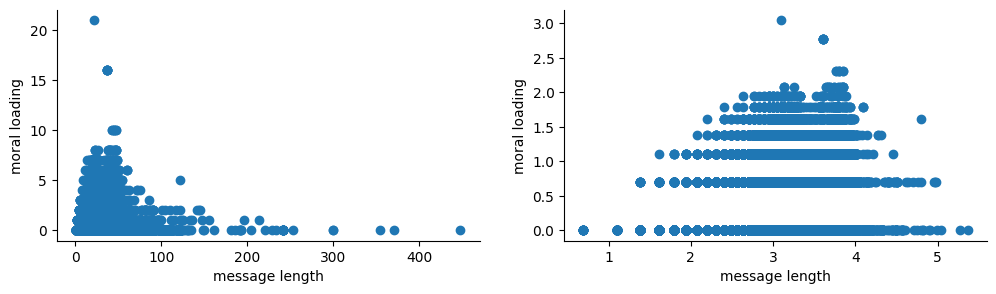

In [196]:
figsize = (12, 3)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = figsize)

ax[0].scatter(twitter_plots_data["message_len"], twitter_plots_data["moral_loading"])
ax[0].set_xlabel("message length")
ax[0].set_ylabel("moral loading")

ax[1].scatter(np.log(twitter_plots_data["message_len"]), np.log(twitter_plots_data["moral_loading"]))
ax[1].set_xlabel("message length")
ax[1].set_ylabel("moral loading")

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

In [ ]:
twitter_plots_data["moral_loading"].isnull()

count    986685.000000
mean          0.636215
std           0.965426
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          21.000000
Name: moral_loading, dtype: float64

In [151]:
def agg_log_plot(data, agg_col, mean_col, axes_labels):

  mask = (data[agg_col] > 0) & (data[mean_col] > 0)
  df = data[mask].copy()

  figsize = (8, 6)
  _, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

  grp = (
      df.groupby(agg_col, as_index=False)[mean_col]
        .apply(lambda s: np.log(s).mean())
        .rename(columns={mean_col: mean_col})
  )

  ax.scatter(np.log(grp[agg_col]), grp[mean_col])
  ax.set_xlabel(axes_labels[0])
  ax.set_ylabel(axes_labels[1])
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.legend()
  plt.tight_layout()


/var/folders/2h/91q4sd4x3t13f8n_dy5nkj_00000gn/T/ipykernel_1424/2691591929.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


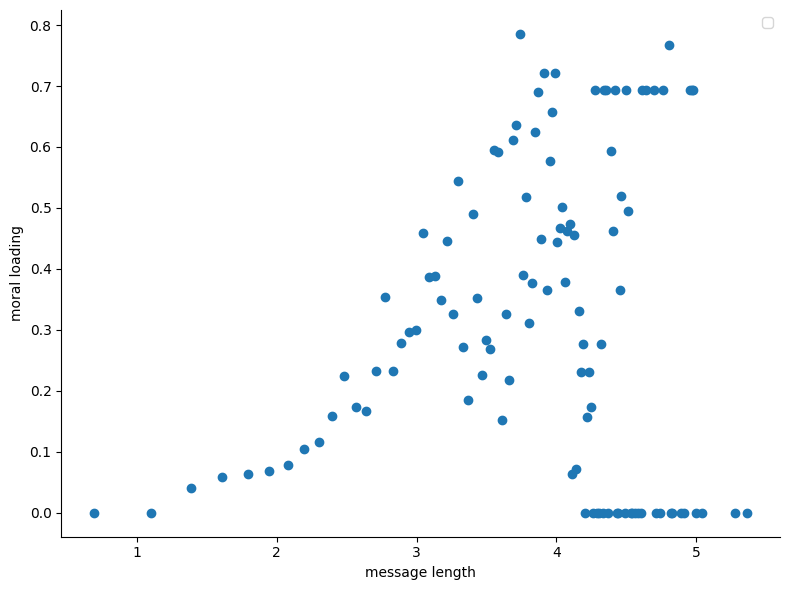

In [152]:
agg_log_plot(twitter_plots_data, "message_len", "moral_loading", ["message length", "moral loading"])

### Moral loading con word embeddings

In [83]:
twitter_plots_data["ddr_moral_loading"] = [cosine_similarity(moral_words_vector.reshape(1, -1), get_representation_vector(kv, doc).reshape(1, -1))[0, 0] for doc in docs]

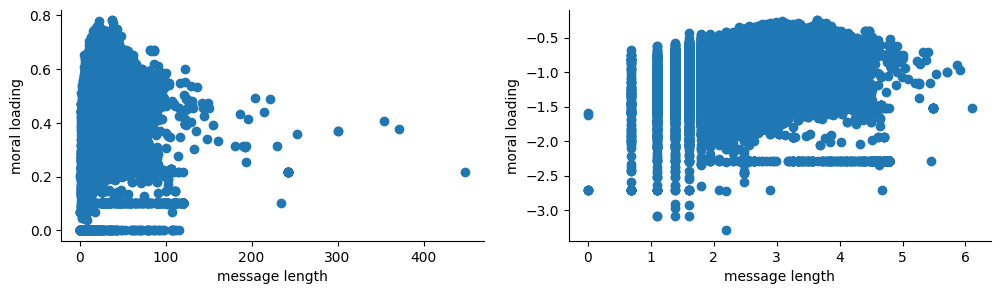

In [197]:
figsize = (12, 3)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = figsize)

ax[0].scatter(twitter_plots_data["message_len"], twitter_plots_data["ddr_moral_loading"])
ax[0].set_xlabel("message length")
ax[0].set_ylabel("moral loading")

ax[1].scatter(np.log(twitter_plots_data["message_len"]), np.log(twitter_plots_data["ddr_moral_loading"]))
ax[1].set_xlabel("message length")
ax[1].set_ylabel("moral loading")

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

/var/folders/2h/91q4sd4x3t13f8n_dy5nkj_00000gn/T/ipykernel_1424/2691591929.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


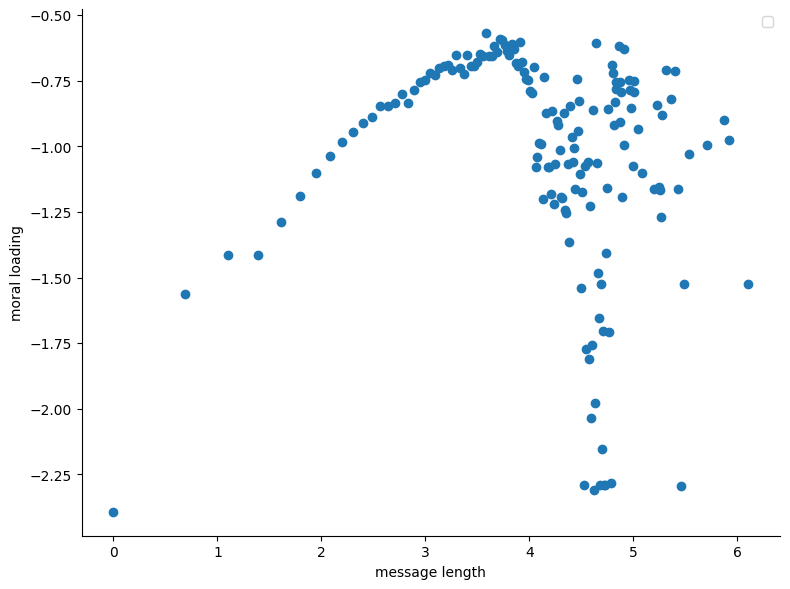

In [153]:
agg_log_plot(twitter_plots_data, "message_len", "ddr_moral_loading", ["message length", "moral loading"])

In [184]:
import warnings

# --- helper robusto: línea + banda para un subconjunto (usa bootstrap) ---
def _fit_line_with_ci(x, y, degree=1, ci=95, n_boot=1500, n_grid=200, rng=None):
    x = np.asarray(x).ravel()
    y = np.asarray(y).ravel()

    m = np.isfinite(x) & np.isfinite(y)
    x, y = x[m], y[m]
    uniq = np.unique(x)
    if uniq.size < 2:
        raise ValueError("El subconjunto no tiene variación en X.")
    if degree >= uniq.size:
        warnings.warn(f"degree={degree} ≥ nº de x únicos ({uniq.size}). Se reduce a {uniq.size-1}.")
        degree = int(uniq.size - 1)

    order = np.argsort(x)
    x, y = x[order], y[order]
    grid = np.linspace(x.min(), x.max(), n_grid)

    coef = np.polyfit(x, y, deg=degree)
    y_hat = np.polyval(coef, grid)

    if rng is None:
        rng = np.random.default_rng(None)

    boots = []
    max_tries = n_boot * 10
    tries = 0
    while len(boots) < n_boot and tries < max_tries:
        tries += 1
        idx = rng.integers(0, x.size, x.size)
        xu, yu = x[idx], y[idx]
        if np.unique(xu).size < degree + 1:
            continue
        try:
            c = np.polyfit(xu, yu, deg=degree)
            boots.append(np.polyval(c, grid))
        except Exception:
            continue
    if not boots:
        raise RuntimeError("No se pudo construir el bootstrap para este rango.")

    boots = np.stack(boots, axis=0)
    lo_q = (100 - ci) / 2
    hi_q = 100 - lo_q
    lo, hi = np.percentile(boots, [lo_q, hi_q], axis=0)
    return grid, y_hat, lo, hi, coef

def plot_line_with_ci_multi(
    df, x_col, y_col, filter_col, ranges,
    axis_labels,
    degree=1, ci=95, n_boot=1500, n_grid=200,
    apply_log_x=True,
    apply_log_y=True, 
    drop_nonpositive="drop",
    random_state=None,
    show_mean=True
):
    """
    ranges: lista de tuplas [(a1,b1), (a2,b2), ...] sobre 'filter_col'
    drop_nonpositive: 'drop' elimina x<=0 o y<=0 antes del log; 'shift' suma eps.
    show_mean: si True, grafica el promedio de y por cada x (en el espacio transformado).
    mean_kwargs: dict opcional con estilo para el promedio (ej: {'marker':'o','linestyle':'-'}).
    """

    rng = np.random.default_rng(random_state)
    fig, ax = plt.subplots(figsize=(7, 4))
    eps = 1e-12
    
    colors = ['blue', 'red']
    i = 0
    for (a, b) in ranges:
        sub = df[(df[filter_col] >= a) & (df[filter_col] <= b)].copy()
        if sub.empty:
            warnings.warn(f"Rango [{a}, {b}] vacío; se omite.")
            continue

        # extrae arrays originales
        x = sub[x_col].to_numpy(dtype=float)
        y = sub[y_col].to_numpy(dtype=float)

        # manejo de log en x
        if apply_log_x:
            if drop_nonpositive == "drop":
                m = x > 0
                x, y = x[m], y[m]
            x = np.log(x if drop_nonpositive == "drop" else x + eps)

        # manejo de log en y
        if apply_log_y:
            if drop_nonpositive == "drop":
                m = y > 0
                x, y = x[m], y[m]
            y = np.log(y if drop_nonpositive == "drop" else y + eps)

        if show_mean and x.size and y.size:
            tmp = pd.DataFrame({"x": x, "y": y})
            # promedio de y para cada valor único de x
            g = tmp.groupby("x", as_index=False, sort=True)["y"].mean()
            ax.scatter(g["x"].to_numpy(), g["y"].to_numpy(),
                    label=f"Mean log-log [{a}, {b}]", color = colors[i])

        # Si quieres volver a activar el ajuste con IC, descomenta estas líneas y define _fit_line_with_ci
        grid, fit, lo, hi, coef = _fit_line_with_ci(
             x, y, degree=degree, ci=ci, n_boot=n_boot, n_grid=n_grid, rng=rng
        )
        ax.plot(grid, fit, linewidth=2, label=f"Linear [{a}, {b}]", color = colors[i])
        ax.fill_between(grid, lo, hi, alpha=0.18, label=f"IC {ci}% [{a:}, {b}]", color = colors[i])
        i+=1

    ax.set_xlabel(axis_labels[0])
    ax.set_ylabel(axis_labels[1])
    ax.legend(ncols=2, fontsize=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.tight_layout()
    return ax



In [185]:
twitter_data["Topic_label"].unique()

array(['Gun Control', 'Same-sex Marriage', 'Climate Change',
       'Trump elections', 'Women March', 'Post Brexit', 'Mueller Report',
       'MeToo', 'Trump_feed', 'Clinton_feed'], dtype=object)

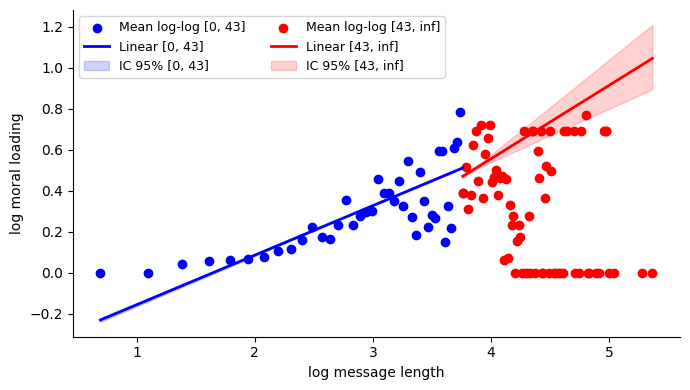

In [188]:
ranges = [(0, 43), (43, np.inf)]  # pon los que quieras

plot_line_with_ci_multi(
    twitter_plots_data,
    x_col="message_len",
    y_col="moral_loading",
    filter_col="message_len",
    ranges=ranges,
    axis_labels=["log message length", "log moral loading"],
    degree=1,
    ci=95,
    n_boot=1500,
    n_grid=200,
    apply_log_x=True,
    apply_log_y=True,
    random_state=42
)
plt.show()

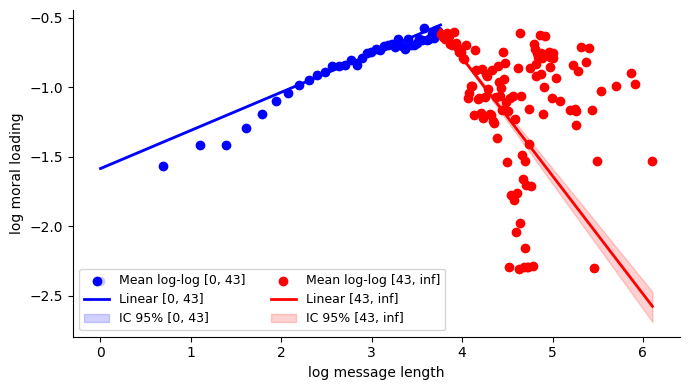

In [189]:
ranges = [(0, 43), (43, np.inf)]  # pon los que quieras

plot_line_with_ci_multi(
    twitter_plots_data,
    x_col="message_len",
    y_col="ddr_moral_loading",
    filter_col="message_len",
    ranges=ranges,
    axis_labels=["log message length", "log moral loading"],
    degree=1,
    ci=95,
    n_boot=1500,
    n_grid=200,
    apply_log_x=True,
    apply_log_y=True,
    random_state=42
)
plt.show()

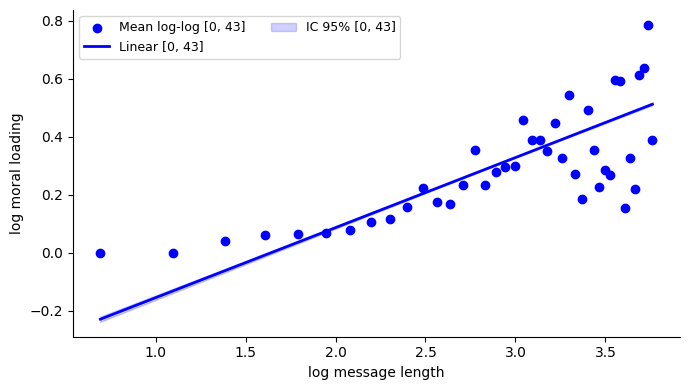

In [190]:
ranges = [(0, 43)]  # pon los que quieras

plot_line_with_ci_multi(
    twitter_plots_data,
    x_col="message_len",
    y_col="moral_loading",
    filter_col="message_len",
    ranges=ranges,
    axis_labels=["log message length", "log moral loading"],
    degree=1,
    ci=95,
    n_boot=1500,
    n_grid=200,
    apply_log_x=True,
    apply_log_y=True,
    random_state=42
)
plt.show()

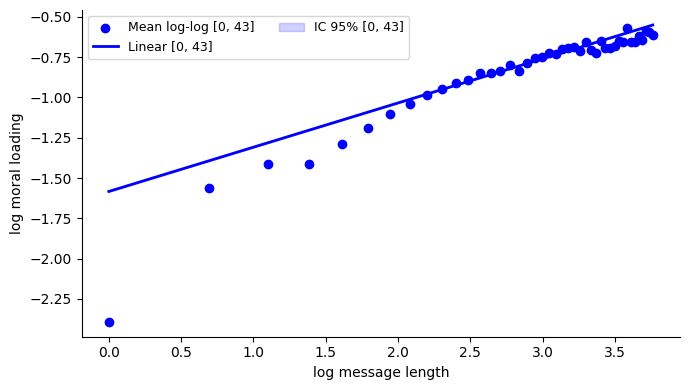

In [191]:
ranges = [(0, 43)]  # pon los que quieras

plot_line_with_ci_multi(
    twitter_plots_data,
    x_col="message_len",
    y_col="ddr_moral_loading",
    filter_col="message_len",
    ranges=ranges,
    axis_labels=["log message length", "log moral loading"],
    degree=1,
    ci=95,
    n_boot=1500,
    n_grid=200,
    apply_log_x=True,
    apply_log_y=True,
    random_state=42
)
plt.show()

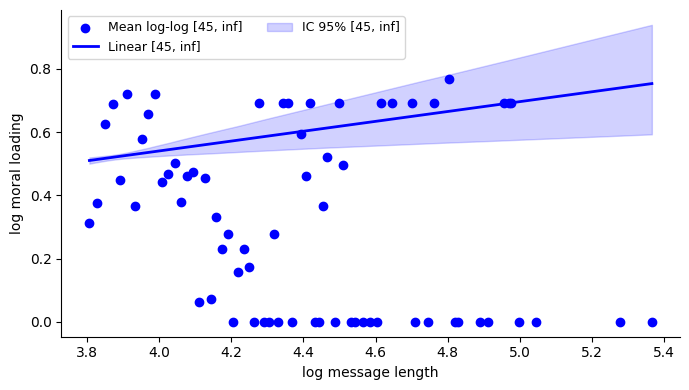

In [192]:
ranges = [(45, np.inf)]  # pon los que quieras

plot_line_with_ci_multi(
    twitter_plots_data,
    x_col="message_len",
    y_col="moral_loading",
    filter_col="message_len",
    ranges=ranges,
    axis_labels=["log message length", "log moral loading"],
    degree=1,
    ci=95,
    n_boot=1500,
    n_grid=200,
    apply_log_x=True,
    apply_log_y=True,
    random_state=42
)
plt.show()


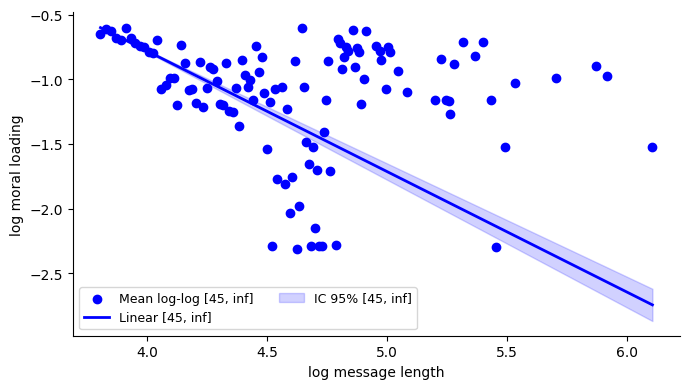

In [193]:
ranges = [(45, np.inf)]  # pon los que quieras

plot_line_with_ci_multi(
    twitter_plots_data,
    x_col="message_len",
    y_col="ddr_moral_loading",
    filter_col="message_len",
    ranges=ranges,
    axis_labels=["log message length", "log moral loading"],
    degree=1,
    ci=95,
    n_boot=1500,
    n_grid=200,
    apply_log_x=True,
    apply_log_y=True,
    random_state=42
)
plt.show()
